In [2]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [3]:
from math import pi, e
import matplotlib.pyplot as plt
import torch
from SourceCode.utilities import nth_derivative, plot_two_1d_functions
from SourceCode.EquationClass import MainEquationClass
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time
dh = 1e-3


n_epochs = 10
n_points = 10

$$y'' - y = 0 $$
$$ y(0) = 0 $$
$$ y(1) = 1 $$

In [12]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    - nn_model(x)
)
n_points = 40

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor(1.0, requires_grad=True)
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions,
                           domain_to_bound_ratio=5)


n_epochs = 60
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs = n_epochs, 
                                           n_hidden_neurons=20, lr=0.1,
                                          n_hidden_layers=2)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

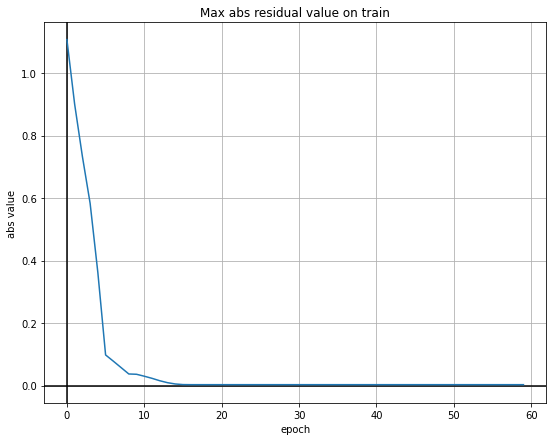

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 3.153085708618164e-05
Valid max absolute error |Appr(x)-y(x)|: 3.11732292175293e-05
MAPE on train data: 0.003426978219067678 %
MAPE on validation data: 0.00339334765158128 %
Max abs value of residual on train at last epoch: 0.0026575326919555664 


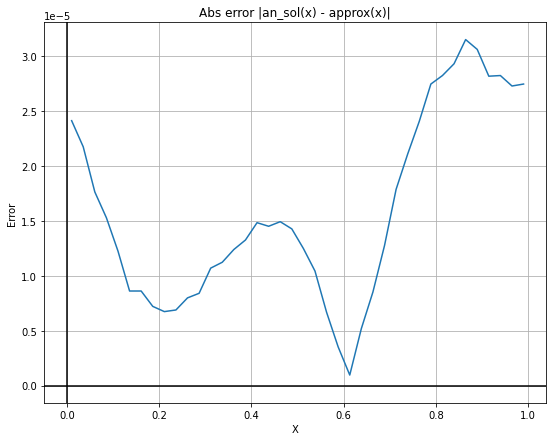

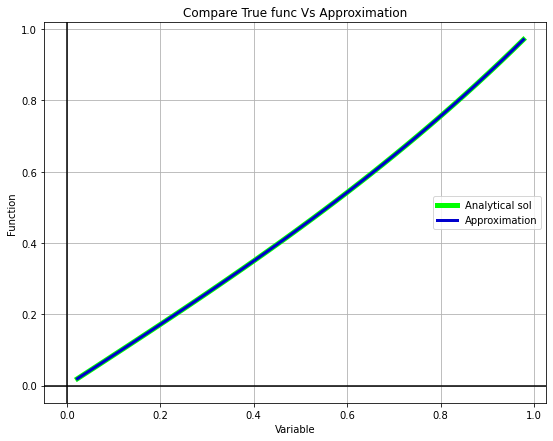

In [13]:
analytical_solution = lambda x: e/(e*e-1)*torch.exp(x) + e/(1-e*e)*torch.exp(-x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5}) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [3]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    + 0.2 * nth_derivative(nn_model(x), x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 80

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_hidden_neurons=50)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

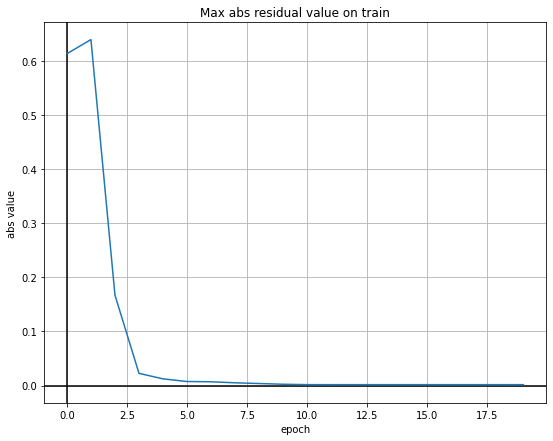

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 2.1068379282951355e-05
Valid max absolute error |Appr(x)-y(x)|: 2.0794570446014404e-05
MAPE on train data: 0.0027527203201316297 %
MAPE on validation data: 0.0027287862394587137 %
Max abs value of residual on train at last epoch: 0.0015522241592407227 


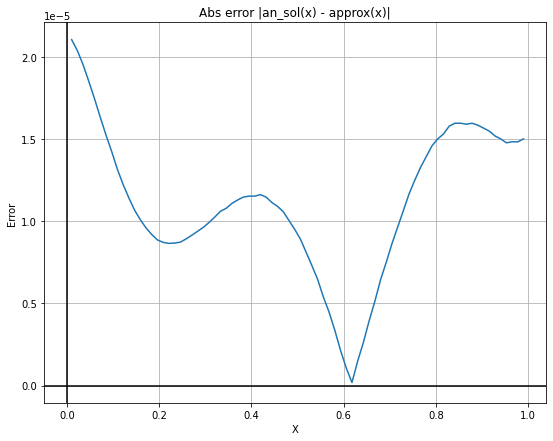

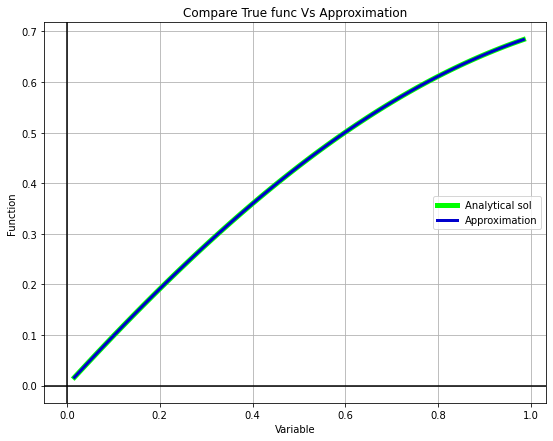

In [4]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

lets try to solve the same problem but on a smaller domain $x \in [0, 0.1]$

In [5]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    + 0.2 * nth_derivative(nn_model(x), x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

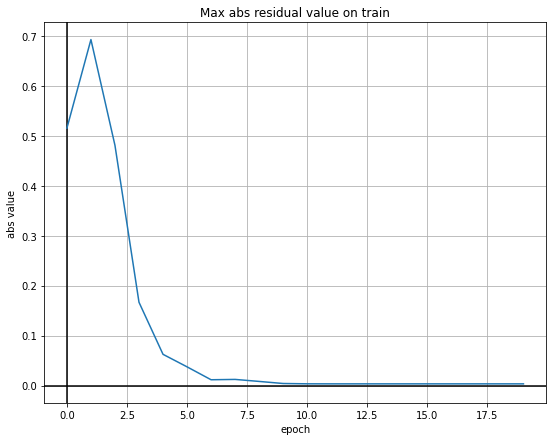

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 5.322694778442383e-05
Valid max absolute error |Appr(x)-y(x)|: 5.346536636352539e-05
MAPE on train data: 0.005736225648433901 %
MAPE on validation data: 0.0054271116823656484 %
Max abs value of residual on train at last epoch: 0.003300964832305908 


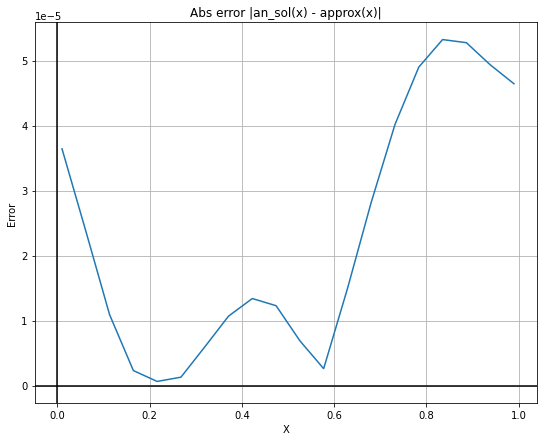

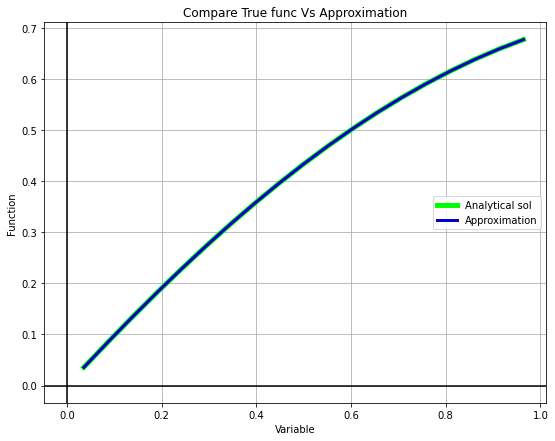

In [6]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

it is strange but descpite my expectations here on a smaller domain NN function performs worse

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [7]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
        + 0.2 * nth_derivative(nn_model(x), x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, lr=0.5)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

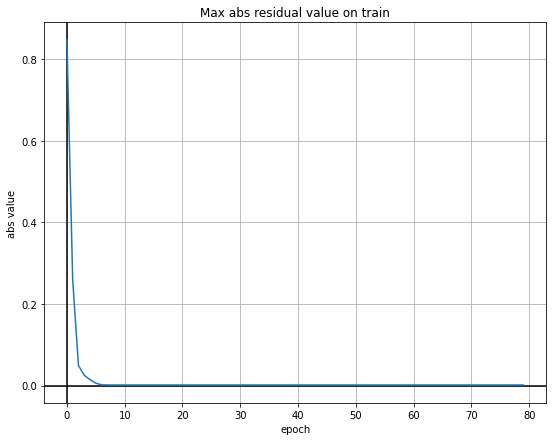

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 7.426738739013672e-05
Valid max absolute error |Appr(x)-y(x)|: 7.31348991394043e-05
MAPE on train data: 0.007127506978577003 %
MAPE on validation data: 0.006948621739866212 %
Max abs value of residual on train at last epoch: 0.0012828335165977478 


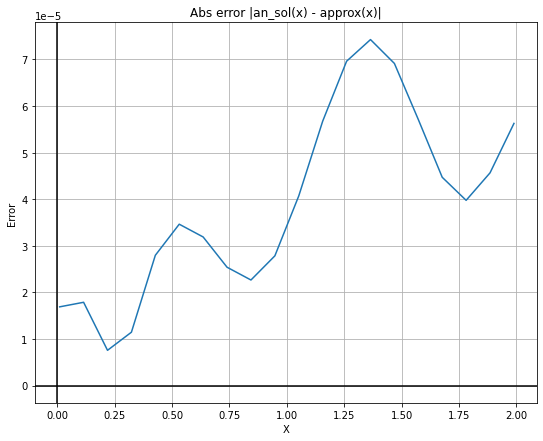

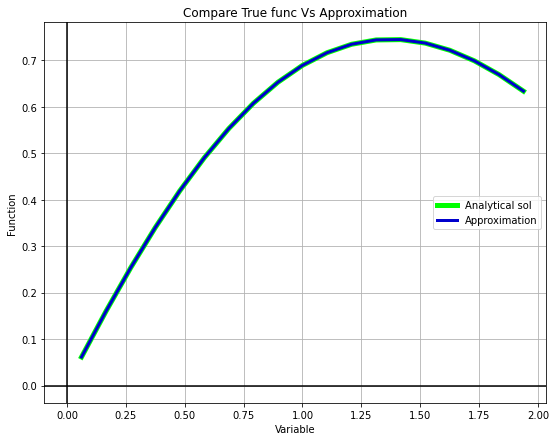

In [8]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [9]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
        + 0.2 * nth_derivative(nn_model(x), x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, lr=0.1)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

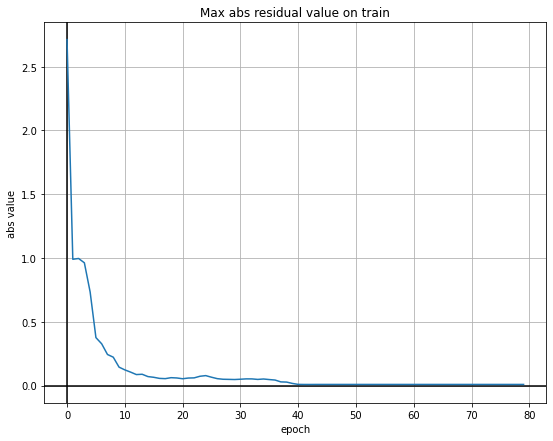

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0018030442297458649
Valid max absolute error |Appr(x)-y(x)|: 0.0018021948635578156
MAPE on train data: 0.1876648049801588 %
MAPE on validation data: 0.18611346604302526 %
Max abs value of residual on train at last epoch: 0.008324505761265755 


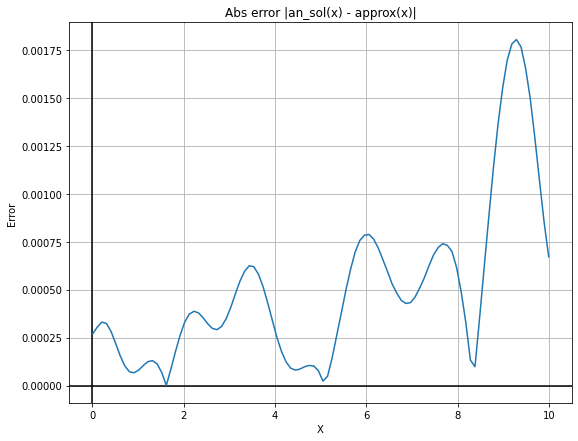

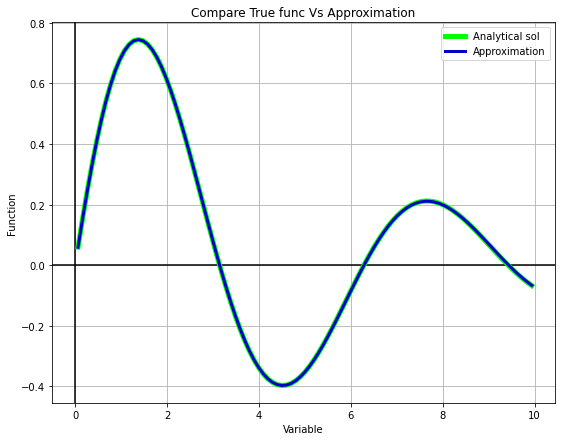

In [10]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [0,20] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [11]:
left_bound = 0
right_bound = 20
main_eq_residual = (
    lambda variable, function: nth_derivative(function(variable), variable, 1)
    + 0.2 * function(variable)
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)
n_epochs = 60
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, lr=0.01)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

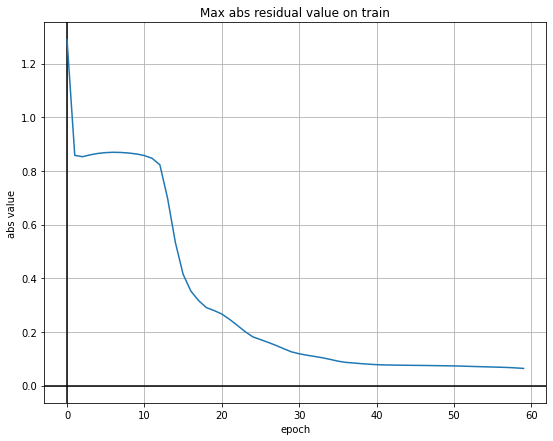

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.06906063854694366
Valid max absolute error |Appr(x)-y(x)|: 0.0669156163930893
MAPE on train data: 21.43658697605133 %
MAPE on validation data: 18.374523520469666 %
Max abs value of residual on train at last epoch: 0.06366792321205139 


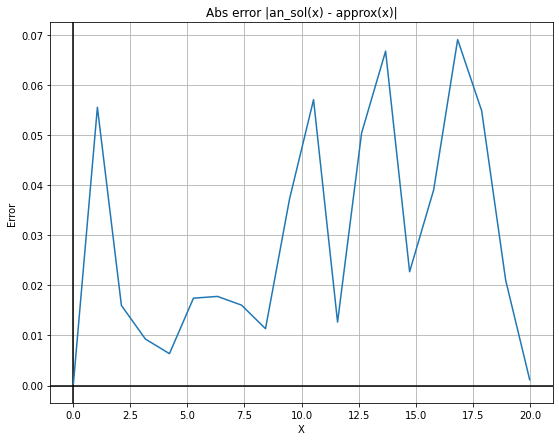

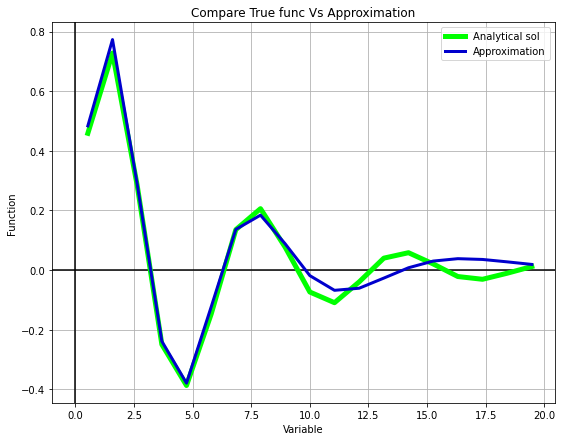

In [12]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [49]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True) * variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 40
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, lr=1)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

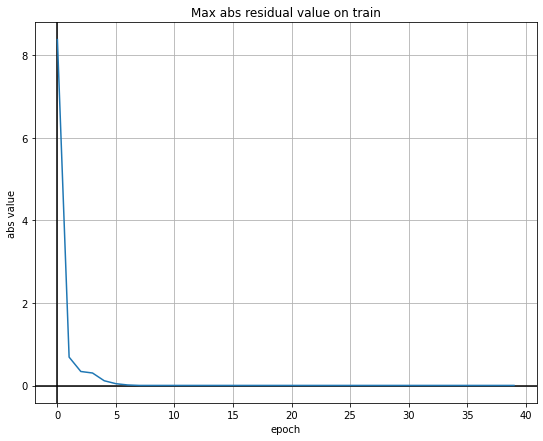

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 6.401538848876953e-05
Valid max absolute error |Appr(x)-y(x)|: 6.449222564697266e-05
MAPE on train data: 0.004563643233268522 %
MAPE on validation data: 0.00464643380837515 %
Max abs value of residual on train at last epoch: 0.0016940832138061523 


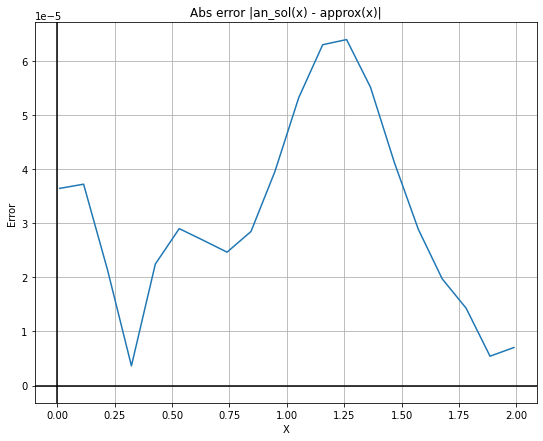

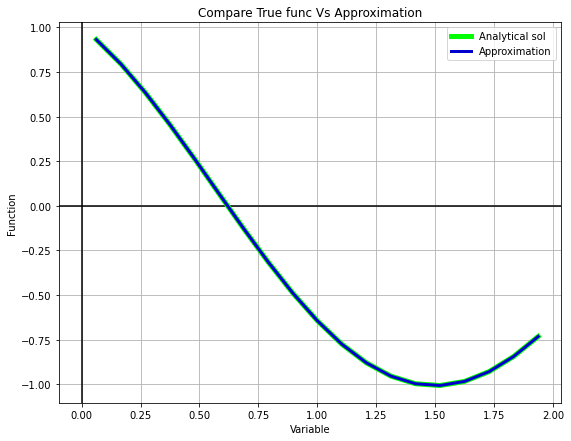

In [50]:
analytical_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence. But we can resolve this issue by adding extra points to domain

In [77]:
left_bound = 0
right_bound = 5
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 50

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, lr=0.1)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

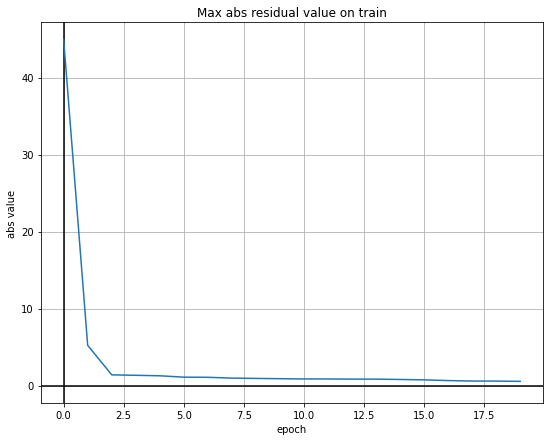

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.5806818008422852
Valid max absolute error |Appr(x)-y(x)|: 0.5653067827224731
MAPE on train data: 50.154733657836914 %
MAPE on validation data: 50.421929359436035 %
Max abs value of residual on train at last epoch: 0.5367474555969238 


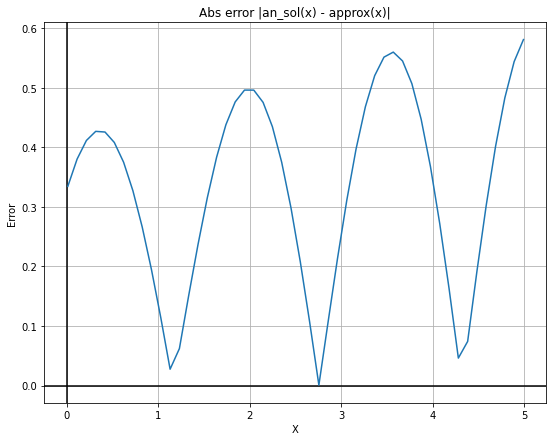

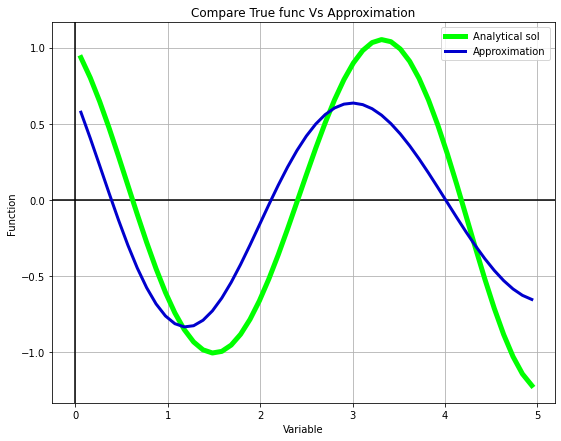

In [78]:
analytical_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №5
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [87]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function: 
      nth_derivative(function(variable), variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function(variable), variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function(variable), variable, 1)
    - function(variable)
    - torch.exp(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 50
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

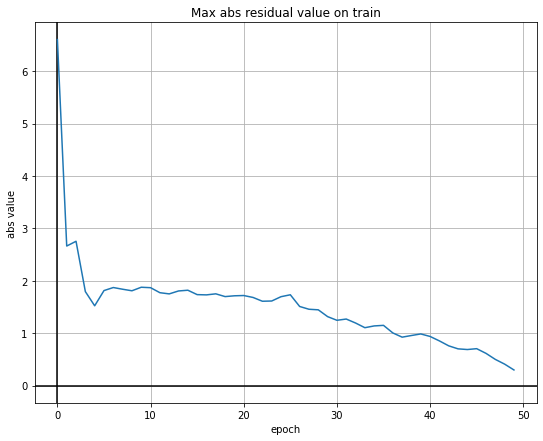

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 3.520050048828125
Valid max absolute error |Appr(x)-y(x)|: 3.098011016845703
MAPE on train data: 7.044512033462524 %
MAPE on validation data: 6.935173273086548 %
Max abs value of residual on train at last epoch: 0.2964247465133667 


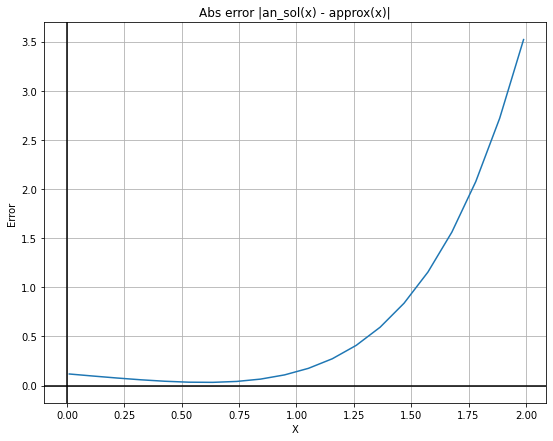

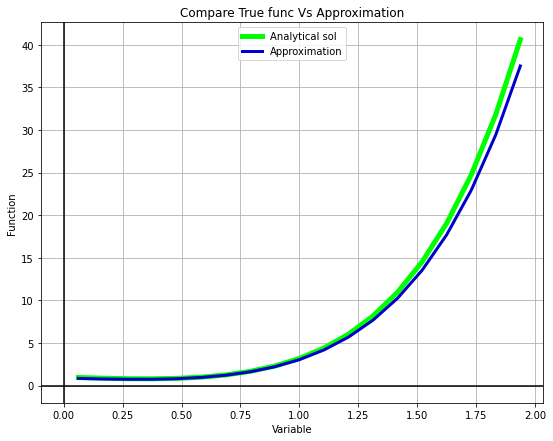

In [88]:
analytical_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [89]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + function(variable)
    + variable
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

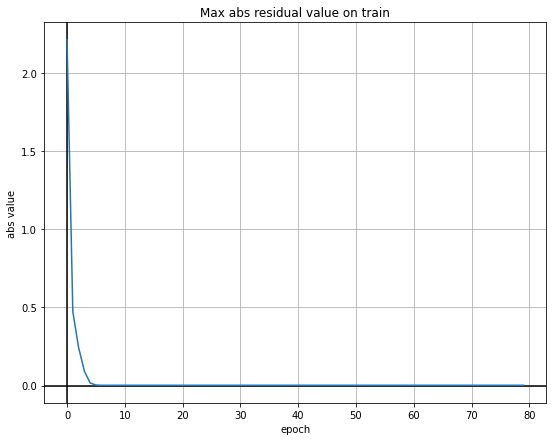

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 5.058571696281433e-05
Valid max absolute error |Appr(x)-y(x)|: 5.0690025091171265e-05
MAPE on train data: 0.06091158138588071 %
MAPE on validation data: 0.056472496362403035 %
Max abs value of residual on train at last epoch: 0.0015835361555218697 


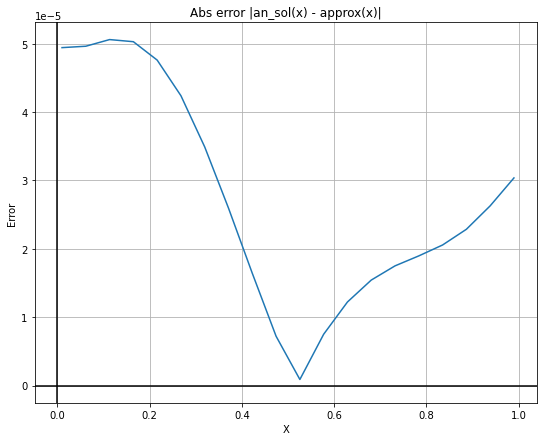

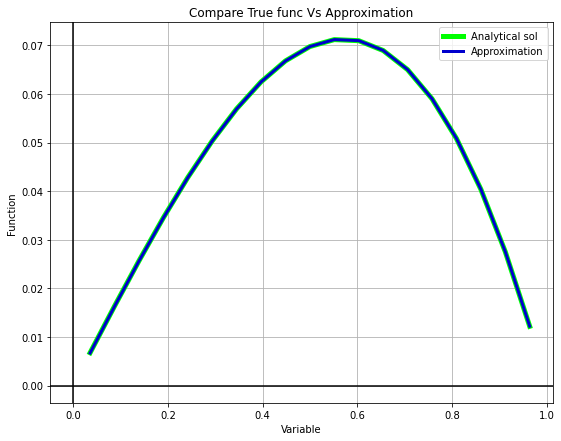

In [90]:
analytical_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [91]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + function(variable)
    - 1
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - nth_derivative(nn_model(x), x, 1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

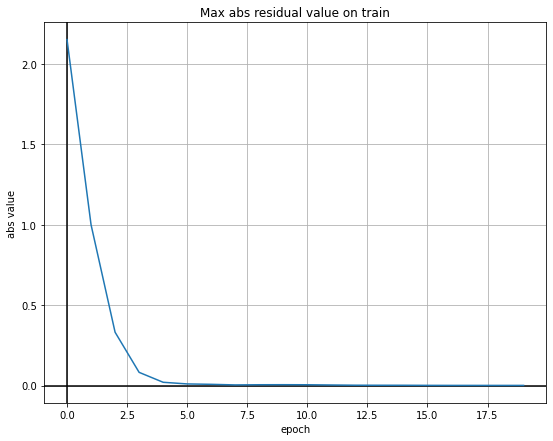

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 4.076957702636719e-05
Valid max absolute error |Appr(x)-y(x)|: 3.9577484130859375e-05
MAPE on train data: 0.0011370358151907567 %
MAPE on validation data: 0.0010798217772389762 %
Max abs value of residual on train at last epoch: 0.0005908012390136719 


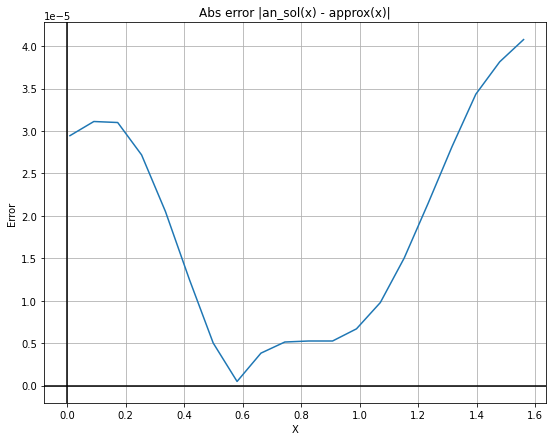

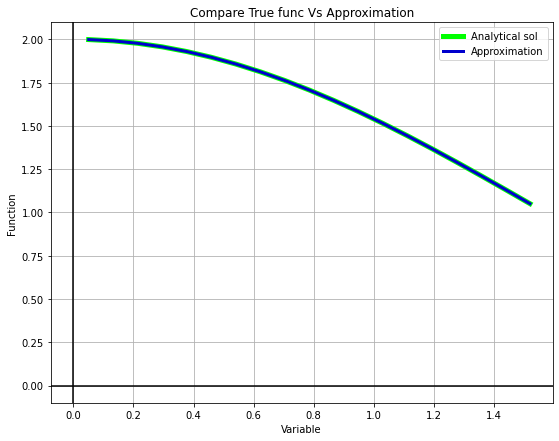

In [92]:
analytical_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [93]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: nth_derivative(function(variable), variable, 2)
    - function(variable)
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
analytical_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 40
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

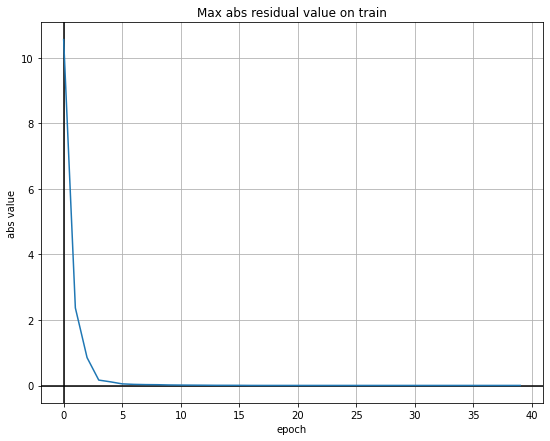

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 6.151199340820312e-05
Valid max absolute error |Appr(x)-y(x)|: 6.151199340820312e-05
MAPE on train data: 0.0018947124772239476 %
MAPE on validation data: 0.0019168217477272265 %
Max abs value of residual on train at last epoch: 0.002017974853515625 


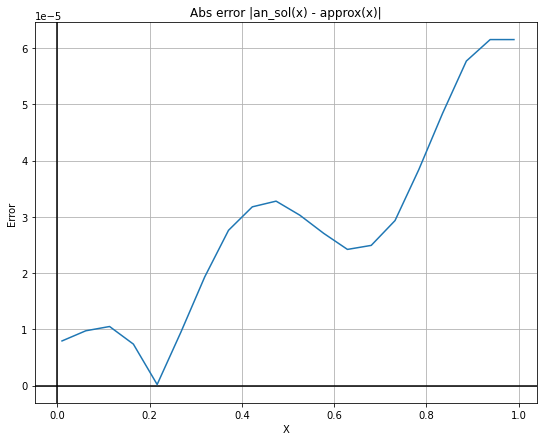

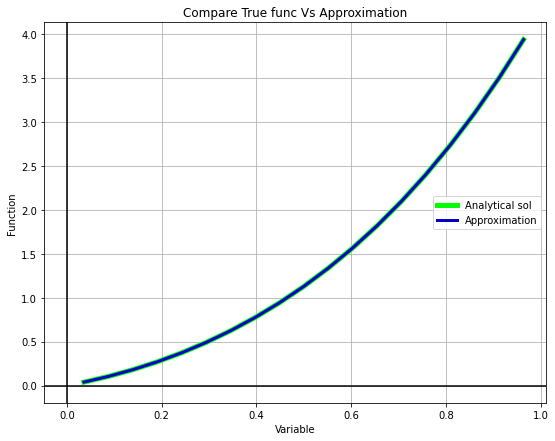

In [94]:
analytical_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [95]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function(variable), variable, 2)
    - 2 * variable * function(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([3.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

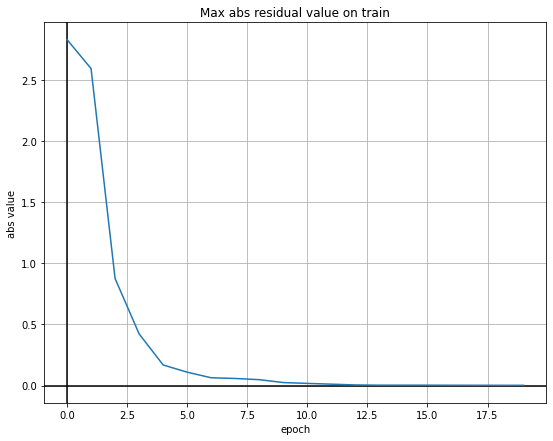

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.03093719482421875
Valid max absolute error |Appr(x)-y(x)|: 0.023154497146606445
MAPE on train data: 0.2099188743159175 %
MAPE on validation data: 0.16258017858490348 %
Max abs value of residual on train at last epoch: 0.0016446113586425781 


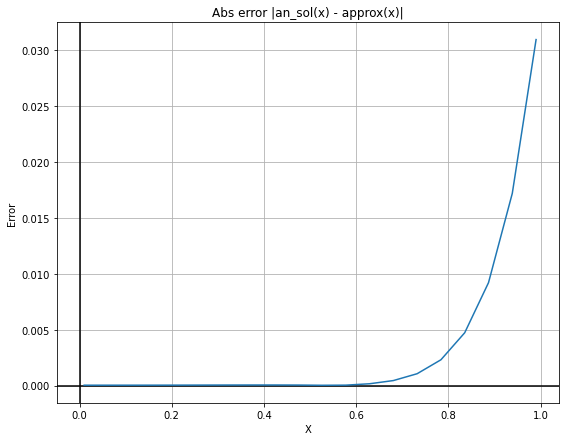

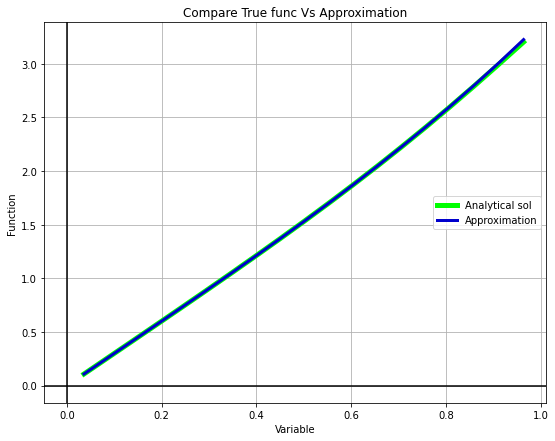

In [96]:
analytical_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [97]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 3)
    + nth_derivative(function(variable), variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,1) + torch.tensor([(1+e)/e], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,2) - torch.tensor([(1-e)/e], requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

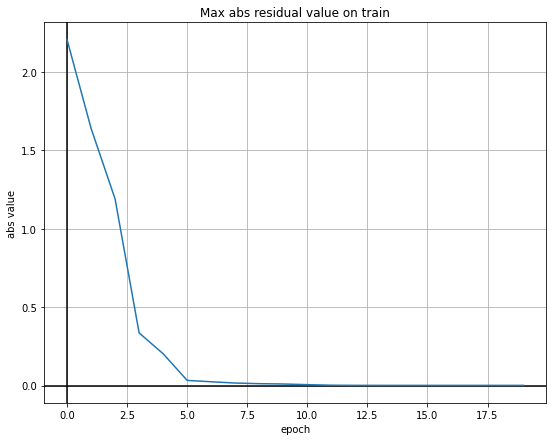

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 3.6463141441345215e-05
Valid max absolute error |Appr(x)-y(x)|: 3.580749034881592e-05
MAPE on train data: 0.0030450584745267406 %
MAPE on validation data: 0.0031040388421388343 %
Max abs value of residual on train at last epoch: 0.00086961779743433 


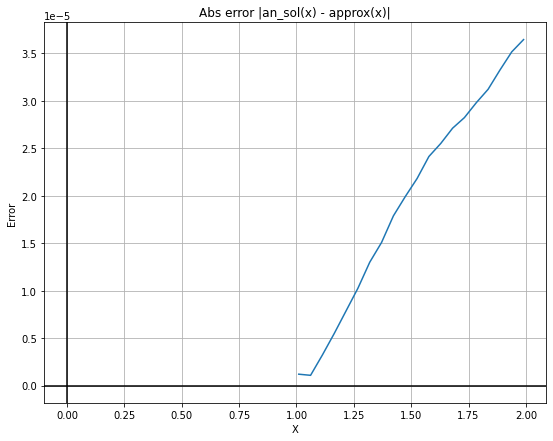

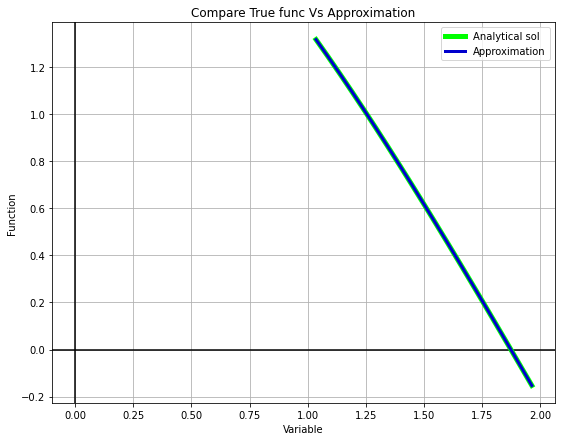

In [98]:
analytical_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [103]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 4)
    + nth_derivative(function(variable), variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions, domain_to_bound_ratio=10)

n_epochs = 40
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, lr=0.5)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

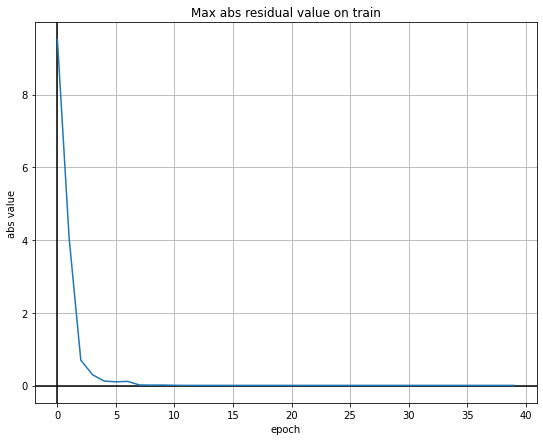

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 9.34600830078125e-05
Valid max absolute error |Appr(x)-y(x)|: 9.167194366455078e-05
MAPE on train data: 0.007798859587637708 %
MAPE on validation data: 0.007778636791044846 %
Max abs value of residual on train at last epoch: 0.0032067298889160156 


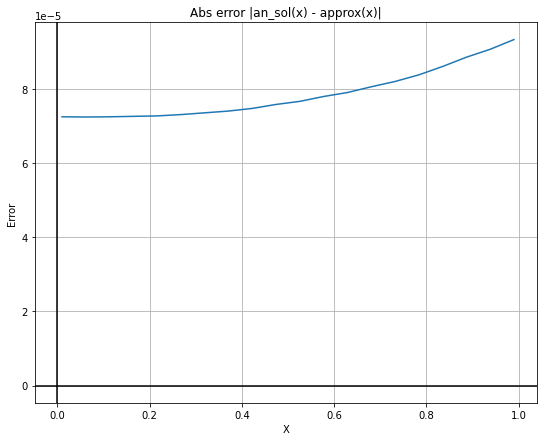

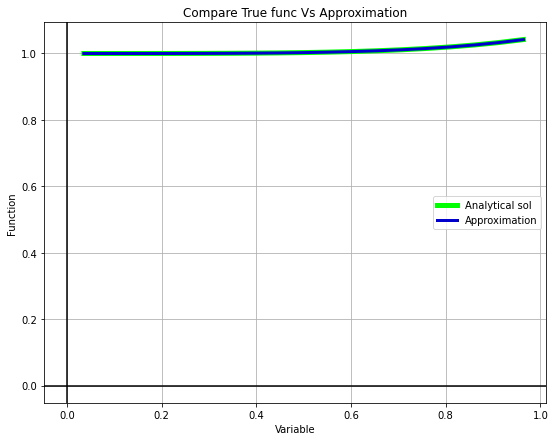

In [104]:
analytical_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [105]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 3)
    + nth_derivative(function(variable), variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

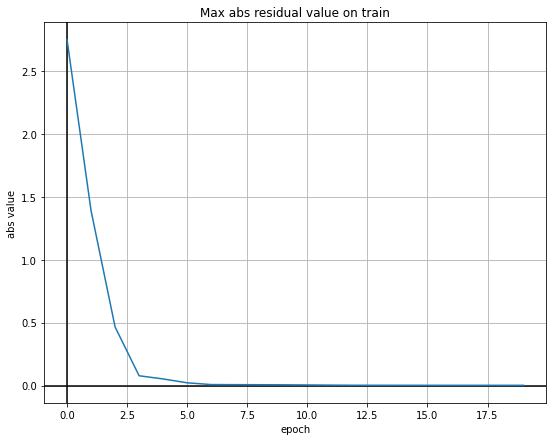

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 4.601478576660156e-05
Valid max absolute error |Appr(x)-y(x)|: 4.458427429199219e-05
MAPE on train data: 0.0010045002454717178 %
MAPE on validation data: 0.0009718401997815818 %
Max abs value of residual on train at last epoch: 0.0015175342559814453 


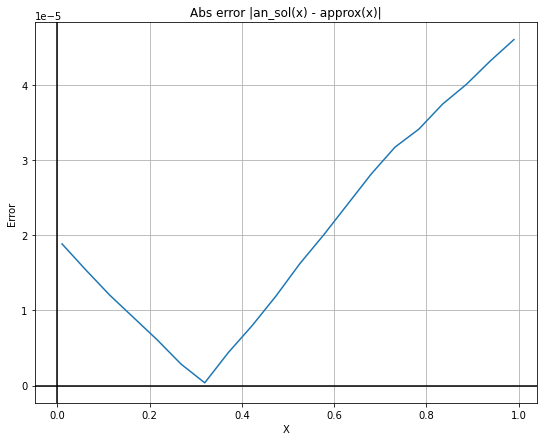

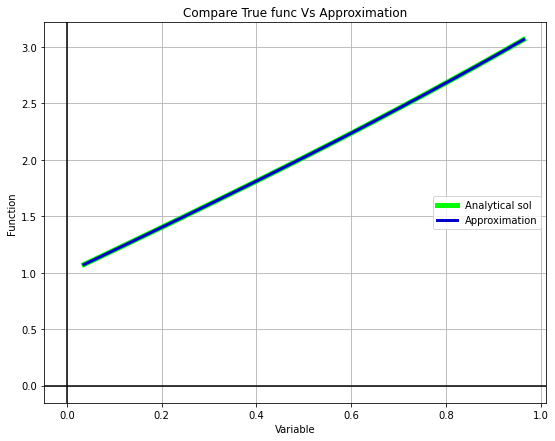

In [106]:
analytical_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [107]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

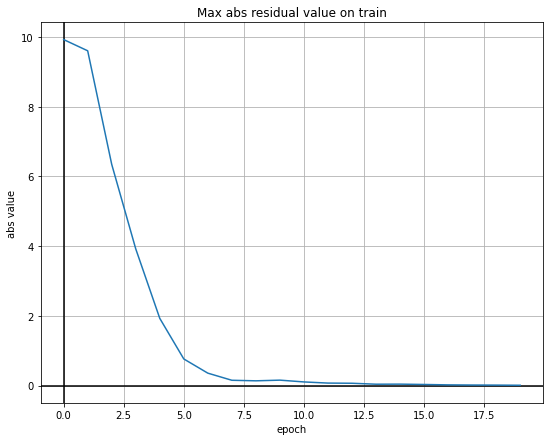

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.003841400146484375
Valid max absolute error |Appr(x)-y(x)|: 0.0038242340087890625
MAPE on train data: 0.004829404133488424 %
MAPE on validation data: 0.004873678699368611 %
Max abs value of residual on train at last epoch: 0.006978034973144531 


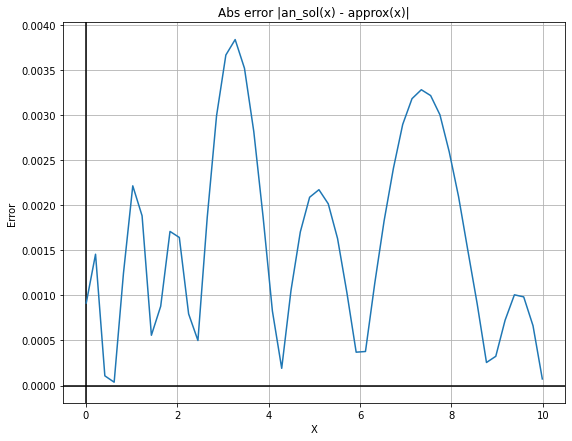

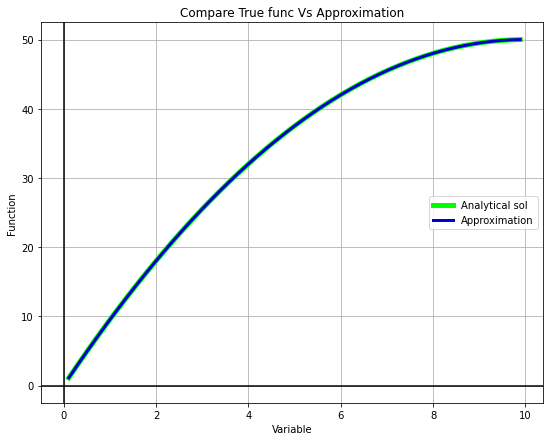

In [108]:
analytical_solution = lambda x: k*m/(2*l)*(2*l-x)*x
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №13
$$ y''+ xy' + \sqrt{x}T_x^{0.5} - 2y= -6x-4x^3 <=> y''+ 2xy' - 2y= -6x-4x^3$$
$$ y(0) = 0 $$
$$ y(1) = 0  $$
$$ x \in [0, 1] $$
$$ true\_sol =  x^2 - x^3 $$

In [109]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function(variable), variable, 2)
    + 2 * variable * nth_derivative(function(variable), variable, 1)
    - 2 * function(variable)
    + 6 * variable + 4 * torch.pow(variable, 3)
)
n_points = 20
analytical_solution = lambda x: x * (1 - x * x)
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x)
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]


start_time = time.time()
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.8520030975341797 seconds ---


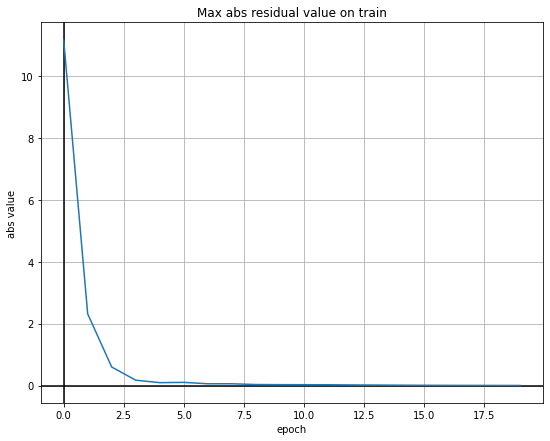

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 8.73953104019165e-06
Valid max absolute error |Appr(x)-y(x)|: 8.89599323272705e-06
MAPE on train data: 0.0018707884009927511 %
MAPE on validation data: 0.0017869284420157783 %
Max abs value of residual on train at last epoch: 0.0011756420135498047 


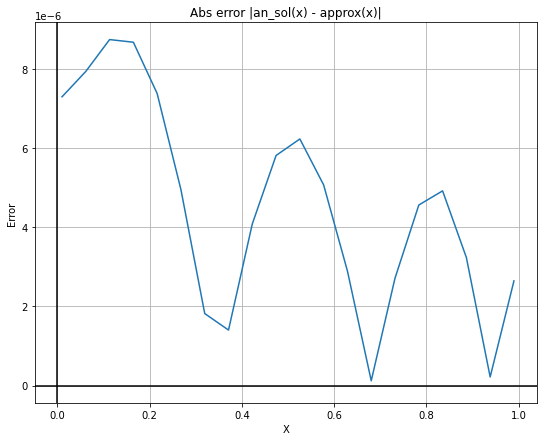

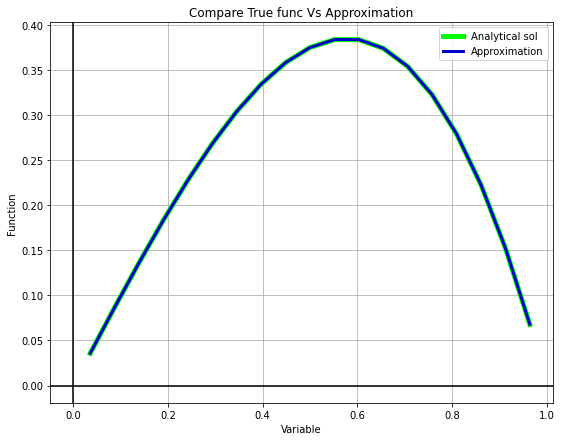

In [110]:
analytical_solution = lambda x: x * (1 - x * x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [39]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.001000      0.001000  0.001050   0.000050
1   0.053526      0.053373  0.053416   0.000043
2   0.106053      0.104860  0.104901   0.000041
3   0.158579      0.154591  0.154632   0.000041
4   0.211105      0.201697  0.201738   0.000040
5   0.263632      0.245309  0.245347   0.000038
6   0.316158      0.284556  0.284590   0.000034
7   0.368684      0.318570  0.318599   0.000029
8   0.421211      0.346480  0.346506   0.000026
9   0.473737      0.367418  0.367444   0.000026
10  0.526263      0.380513  0.380540   0.000027
11  0.578789      0.384897  0.384924   0.000027
12  0.631316      0.379699  0.379726   0.000027
13  0.683842      0.364050  0.364076   0.000026
14  0.736368      0.337081  0.337105   0.000024
15  0.788895      0.297922  0.297946   0.000023
16  0.841421      0.245704  0.245728   0.000025
17  0.893947      0.179557  0.179583   0.000026
18  0.946474      0.098611  0.098639   0.000028
19  0.999000      0.001997  0